In [45]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = yf.download('AAPL', start = '2010-01-01', end = '2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [49]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04 00:00:00+00:00,6.447413,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05 00:00:00+00:00,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06 00:00:00+00:00,6.355826,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07 00:00:00+00:00,6.344078,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08 00:00:00+00:00,6.386254,7.570714,7.571429,7.466429,7.510714,447610800


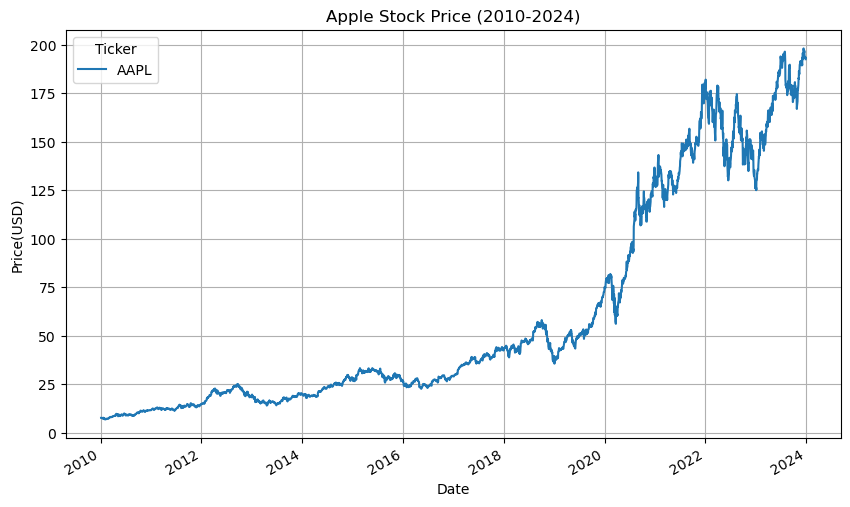

In [51]:
# Plotting the Closing Price of Apple Stock
data['Close'].plot(figsize=(10,6))
plt.title('Apple Stock Price (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.show()

In [53]:
data.isnull().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  3522 non-null   float64
 1   (Close, AAPL)      3522 non-null   float64
 2   (High, AAPL)       3522 non-null   float64
 3   (Low, AAPL)        3522 non-null   float64
 4   (Open, AAPL)       3522 non-null   float64
 5   (Volume, AAPL)     3522 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 192.6 KB


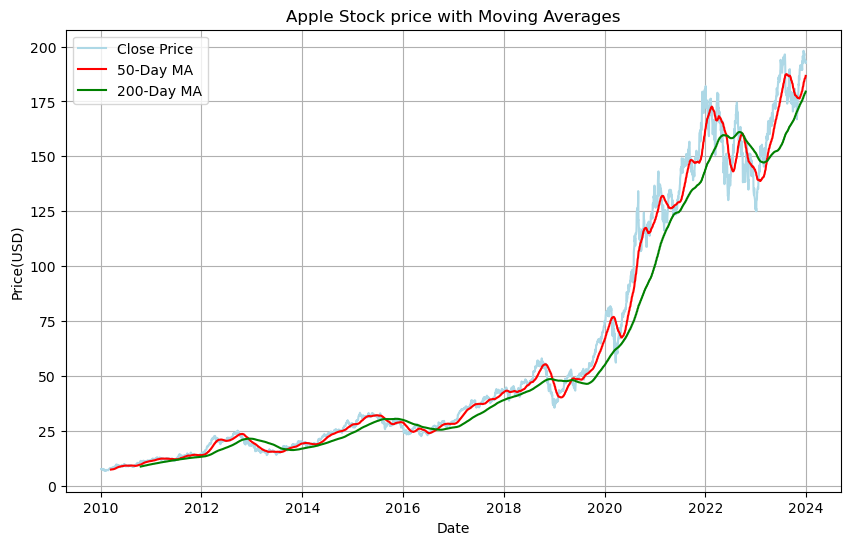

In [57]:
# Calculate 50-day and 200-day moving averages
data['50_MA'] = data['Close'].rolling(window = 50).mean()
data['200_MA'] = data['Close'].rolling(window = 200).mean()

# Plotting the Closing price with moving averages
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label = 'Close Price', color = 'lightblue')
plt.plot(data['50_MA'], label = '50-Day MA', color = 'red')
plt.plot(data['200_MA'], label = '200-Day MA', color = 'green')
plt.title('Apple Stock price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid()
plt.show()

In [59]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

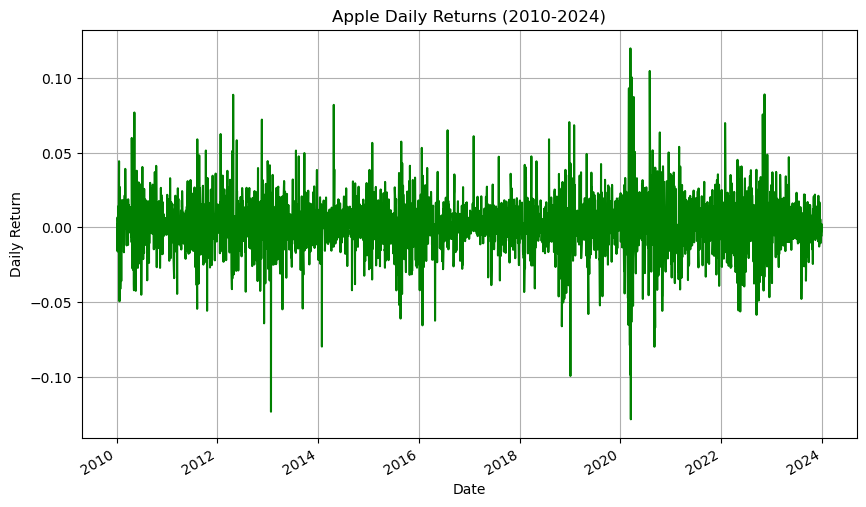

In [83]:
#Plot the daily returns
data['Daily_Return'].plot(kind = 'line',figsize=(10,6), color = 'green')
plt.title('Apple Daily Returns (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

In [95]:
#Calculate rolling standard deviation (Volatility) for 30 days
data['Volatility'] = data['Daily_Return'].rolling(window=30).std()

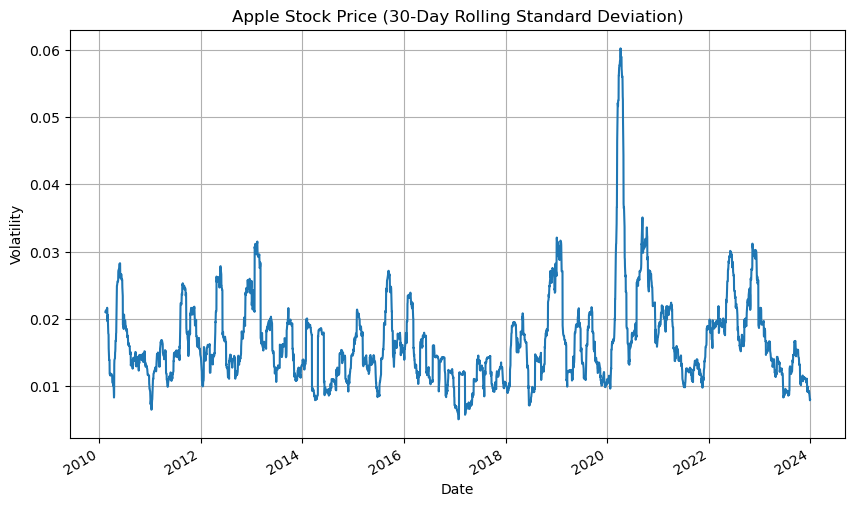

In [97]:
#Plot the volatility
data['Volatility'].plot(figsize=(10,6))
plt.title('Apple Stock Price (30-Day Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

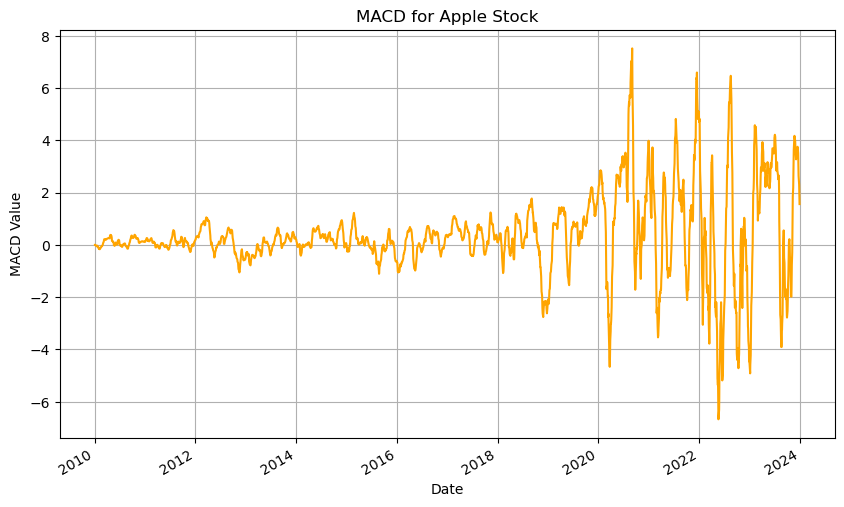

In [101]:
# Calculate MACD (12-day EMA - 26-day EMA)
data['12_EMA'] = data['Close'].ewm(span=12, adjust=False).mean()
data['26_EMA'] = data['Close'].ewm(span=26, adjust=False).mean()

# MACD line
data['MACD'] = data['12_EMA'] - data['26_EMA']

# Plot MACD
data['MACD'].plot(figsize=(10,6), color='orange')
plt.title('MACD for Apple Stock')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.grid(True)
plt.show()


In [125]:
import numpy as np

# Calculate 5% VaR
confidence_level = 0.05
VaR = np.percentile(data['Daily_Return'].dropna(), confidence_level * 100)

print(f"5% Value at Risk (VaR): {VaR * 100:.2f}%")


5% Value at Risk (VaR): -2.67%


In [129]:
!pip install Prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - ---------------

In [133]:
from prophet import Prophet

In [139]:
#Prepare the data for Prophet
forecast_data = data.reset_index()[['Date','Close']]
forecast_data.columns = ['ds', 'y']

In [143]:
forecast_data['ds'] = forecast_data['ds'].dt.tz_localize(None)


In [145]:
model = Prophet()
model.fit(forecast_data)

12:21:32 - cmdstanpy - INFO - Chain [1] start processing
12:21:33 - cmdstanpy - INFO - Chain [1] done processing


In [147]:
# Create a dataframe for future dates
future_dates = model.make_future_dataframe(periods=365)  # Predict for the next 365 days

# Predict future stock prices
forecast = model.predict(future_dates)


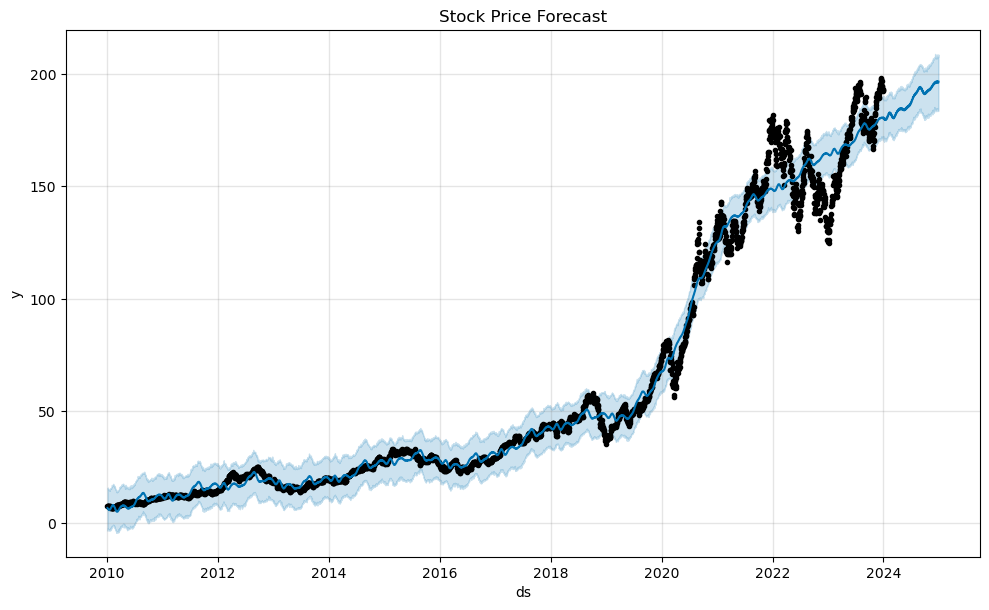

In [149]:
# Plot the forecast
model.plot(forecast)
plt.title('Stock Price Forecast')
plt.show()


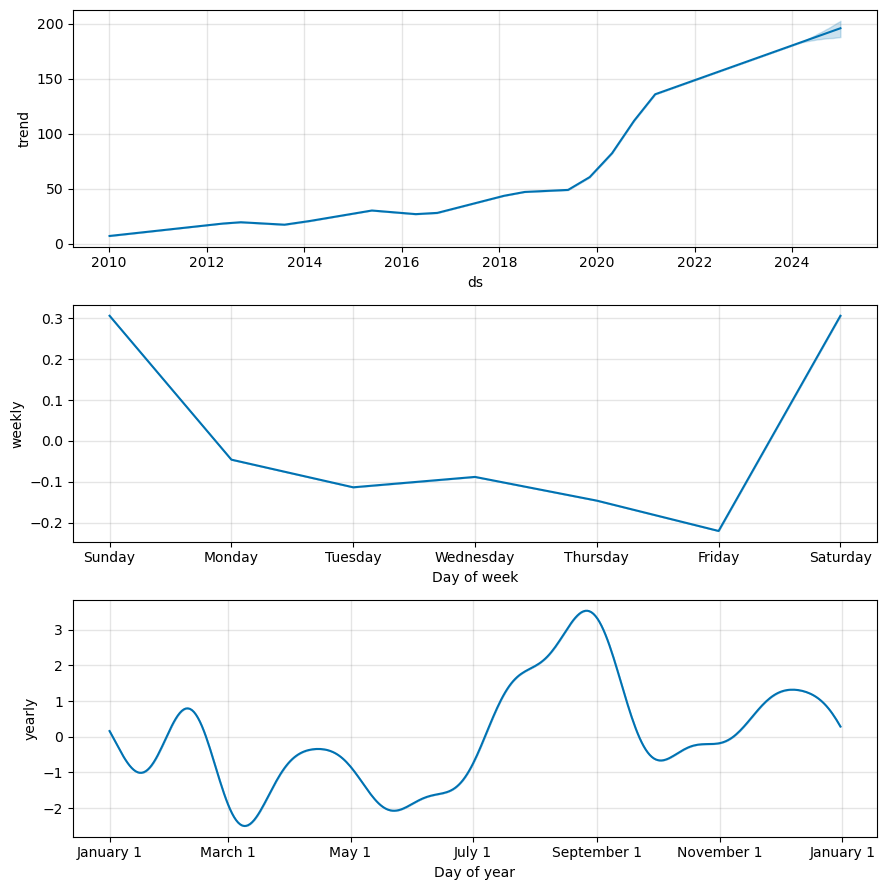

In [151]:
# Plot trend components
model.plot_components(forecast)
plt.show()
